# **Method for verifying Algorithm correction** 
- **Code written by: Billy Atkinson (watkinson@umces.edu)** 
- **Date of Last Revision: 01/09/2023** 
- **This code compares eddy output between original dataset and the adjusted dataset** 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import ma
import xarray as xr
import pandas as pd
import glob
import os

# Plot the original algorithm SSH data and the adjusted algorithm SSH data to review results

In [2]:
from py_eddy_tracker import data
from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.observations.observation import EddiesObservations

File was created with py-eddy-tracker version 'None' but software version is '3.6'
File was created with py-eddy-tracker version 'None' but software version is '3.6'


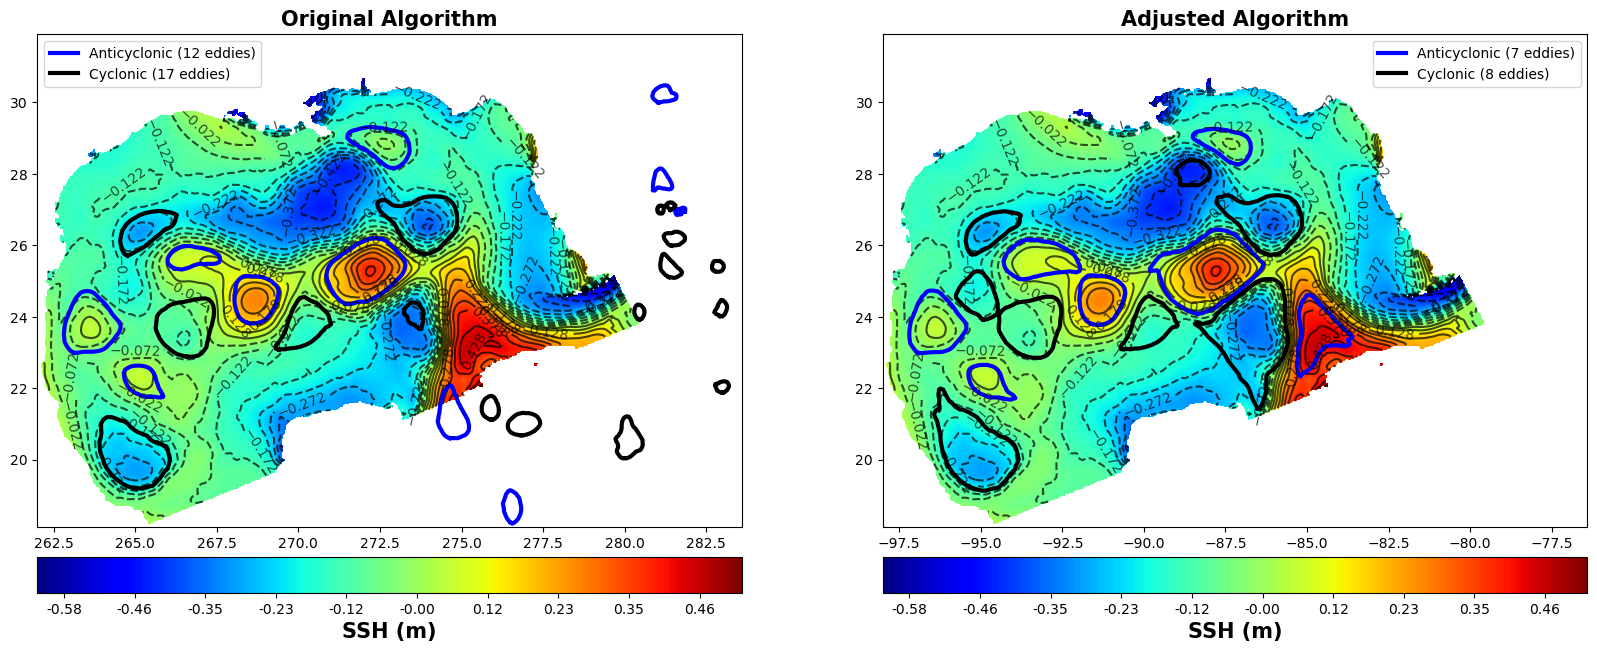

In [34]:
#create xes and figure parameters
SSH_data = xr.open_dataset('/data/watkinson/Fall2022/SSH_data/Cropped_SSH_Data/hycom_gomu_501_20031215_cropped.nc')
dir = "/data/watkinson/Fall2022/Eddy_data/"
#Original Algorithm
a1 = EddiesObservations.load_file(dir + 'Original_eddies/Anticyclonic/Anticyclonic_20031215.nc')
c1 = EddiesObservations.load_file(dir + 'Original_eddies/Cyclonic/Cyclonic_20031215.nc')

#Adjusted Algorithm
a2 = EddiesObservations.load_file(dir + 'GoM_tuned_eddies/Anticyclonic/Anticyclonic_20031215.nc')
c2 = EddiesObservations.load_file(dir + 'GoM_tuned_eddies/Cyclonic/Cyclonic_20031215.nc')


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,8))
ax1.set_title('Original Algorithm',loc='center',fontsize=15,fontweight='bold')
ax2.set_title('Adjusted Algorithm',loc='center',fontsize=15,fontweight='bold')
#load in lat, lon and SSh data for plot
lat=SSH_data.lat
lon=SSH_data.lon+360
ssh = SSH_data.adt
lon2=SSH_data.lon
#Make lon and lat a 2d mesh grid for plotting purposes
lon2d,lat2d=np.meshgrid(lon,lat)
lon2d2,lat2d2=np.meshgrid(lon2,lat)
#plot original SSH using contourf and contour
cf = ax1.contourf(lon2d,lat2d,ssh[:,:,0],cmap='jet',levels=np.linspace(np.min(ssh[:,:,0]),np.max(ssh[:,:,0]),400))
cl = ax1.contour(lon2d,lat2d,ssh[:,:,0],colors='k',alpha=.7,levels=np.arange(np.min(ssh[:,:,0]),np.max(ssh[:,:,0]),.05))
a1.display(ax1, extern_only=True, label='Anticyclonic ({nb_obs} eddies)',color='blue',lw=3,ls='solid') 
c1.display(ax1, extern_only=True, label="Cyclonic ({nb_obs} eddies)", color="k", lw=3,ls='solid')
plt.clabel(cl, inline=1, fontsize=10)
cbar = fig.colorbar(cf,ax=ax1,location='bottom',format='%.2f',pad=.05)#shrink=.6,pad=.04)
cbar.ax.set_xlabel('SSH (m)',fontsize=15,fontweight='bold')

#plot masked SSH using contourf and contour
cf2 = ax2.contourf(lon2d2,lat2d2,ssh[:,:,0],cmap='jet',levels=np.linspace(np.min(ssh[:,:,0]),np.max(ssh[:,:,0]),400))
cl2 = ax2.contour(lon2d2,lat2d2,ssh[:,:,0],colors='k',alpha=.7,levels=np.arange(np.min(ssh[:,:,0]),np.max(ssh[:,:,0]),.05))
a2.display(ax2, extern_only=True, label='Anticyclonic ({nb_obs} eddies)',color='blue',lw=3,ls='solid') 
c2.display(ax2, extern_only=True, label="Cyclonic ({nb_obs} eddies)", color="k", lw=3,ls='solid')
plt.clabel(cl2, inline=1, fontsize=10)
cbar = fig.colorbar(cf2,ax=ax2,location='bottom',format='%.2f',pad=.05)#shrink=.6,pad=.04)
cbar.ax.set_xlabel('SSH (m)',fontsize=15,fontweight='bold')
_= ax1.legend(loc="best")
_= ax2.legend(loc="best")